In [5]:
from google.colab import files

f = files.upload()

Saving Heart Disease dataset.csv to Heart Disease dataset.csv


In [0]:
import numpy as np
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [95]:
df = pd.read_csv('Heart Disease dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [97]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Feature Selection

In [0]:
correlation = df.corr()

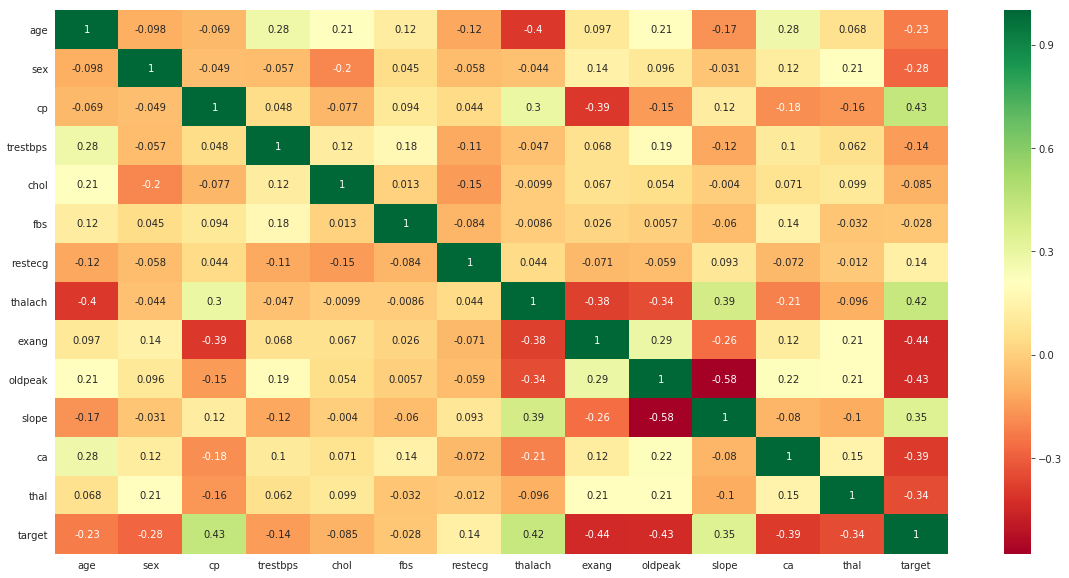

In [99]:
plt.figure(figsize =(20, 10))
sns.heatmap(correlation, annot=True, cmap='RdYlGn')


In [0]:
from sklearn.ensemble import ExtraTreesClassifier

In [0]:
X = df.iloc[:,0:13]
y = df.iloc[:, -1]

In [0]:
feature_clf = ExtraTreesClassifier()

In [103]:
feature_clf.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [104]:
feature_clf.feature_importances_

array([0.06510817, 0.05650571, 0.13591738, 0.05887511, 0.05017956,
       0.02125737, 0.03191584, 0.08516544, 0.1318939 , 0.0758607 ,
       0.07022056, 0.14969738, 0.06740285])

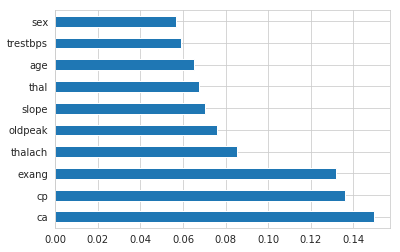

In [105]:
feature_importance = pd.Series(feature_clf.feature_importances_, index = X.columns)
feature_importance.nlargest(10).plot(kind = 'barh')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1f9d5f978>,
      dtype=object)

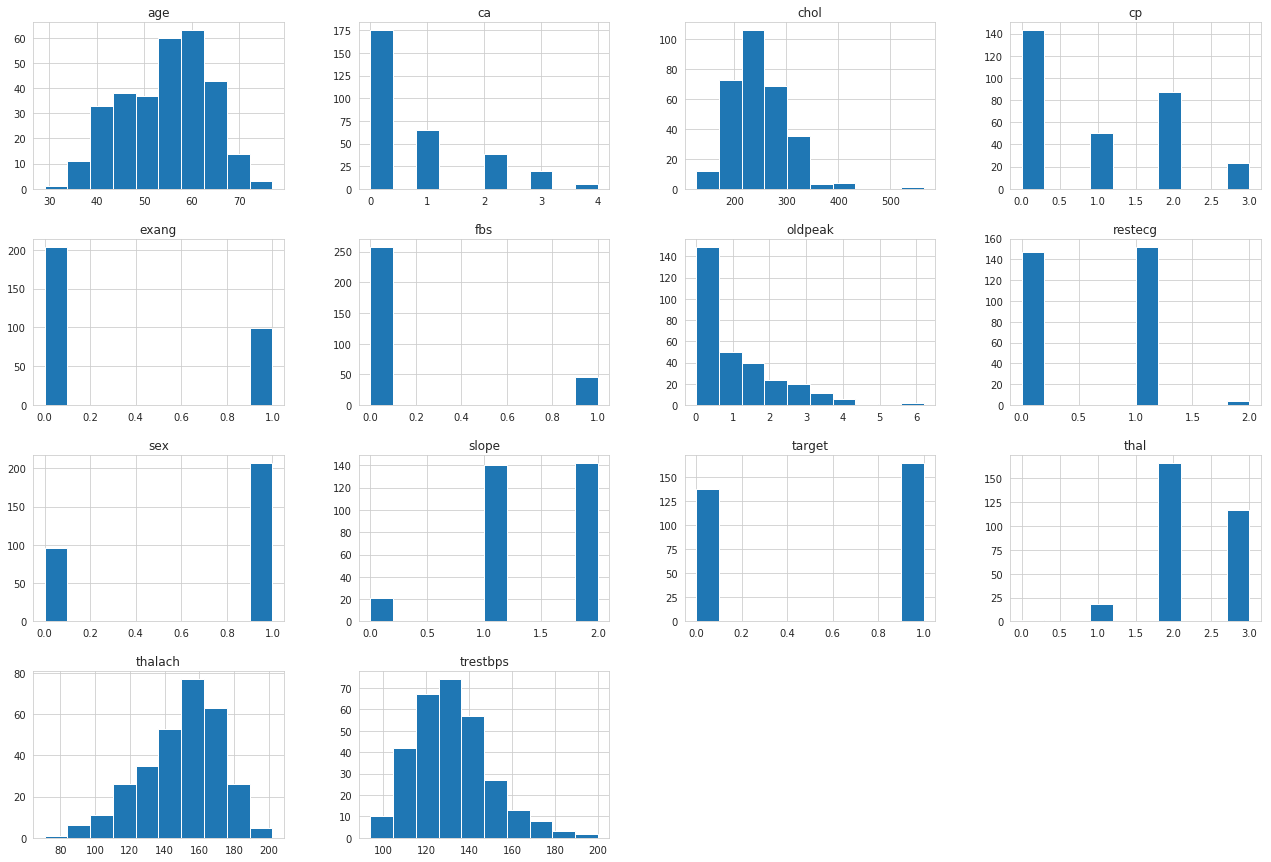

In [106]:
df.hist(figsize = (22,15))

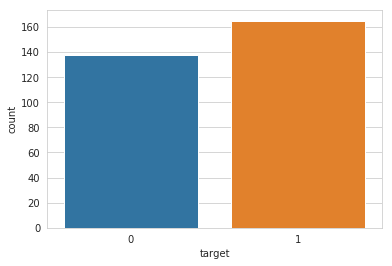

In [107]:
sns.set_style('whitegrid')
sns.countplot(x=df.target, data = df)

In [0]:
# df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

Scalling data

In [0]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()

col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

df[col_to_scale] = SS.fit_transform(df[col_to_scale])

In [115]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [0]:
X = np.array(df.drop(['target'], 1))
y = np.array(df['target'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2)

# KNN Classifier

In [0]:
from sklearn.model_selection import cross_val_score
error_rate = {}
error = []
sc=[]

for i in range(1,41):
  clf = KNeighborsClassifier(n_neighbors=i)
  
  knn = clf.fit(X_train, y_train)
  pred = clf.score(X_test, y_test)
  sc.append(pred)
  
  score = cross_val_score(clf, X, y, cv=10)
  error_rate[i] = score.mean()
  error.append(score.mean())
 

Text(0, 0.5, 'Accuracy')

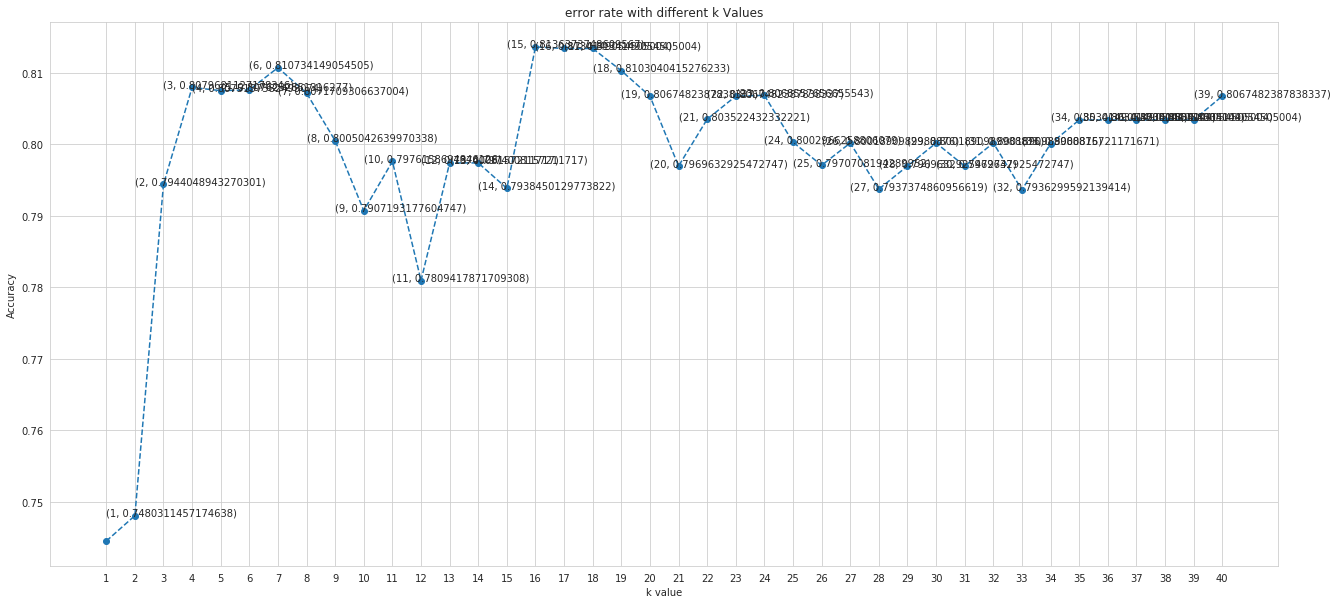

In [144]:
plt.figure(figsize=(22,10))
plt.plot(list(error_rate.keys()), list(error_rate.values()), linestyle = 'dashed', marker='o')
for i in range(1, 40):
  plt.text(i, error[i], (i, error[i]))
plt.xticks([i for i in range(1, 41)])
plt.title('error rate with different k Values')
plt.xlabel('k value')
plt.ylabel('Accuracy')

# Random Forest

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
error_rate={}
error = []
for i in range(1, 40):
  clf1 = RandomForestClassifier(n_estimators=i)
  val = cross_val_score(clf1, X, y, cv=10)
  error_rate[i] = val.mean()
  error.append(val.mean())

Text(0, 0.5, 'accuracy')

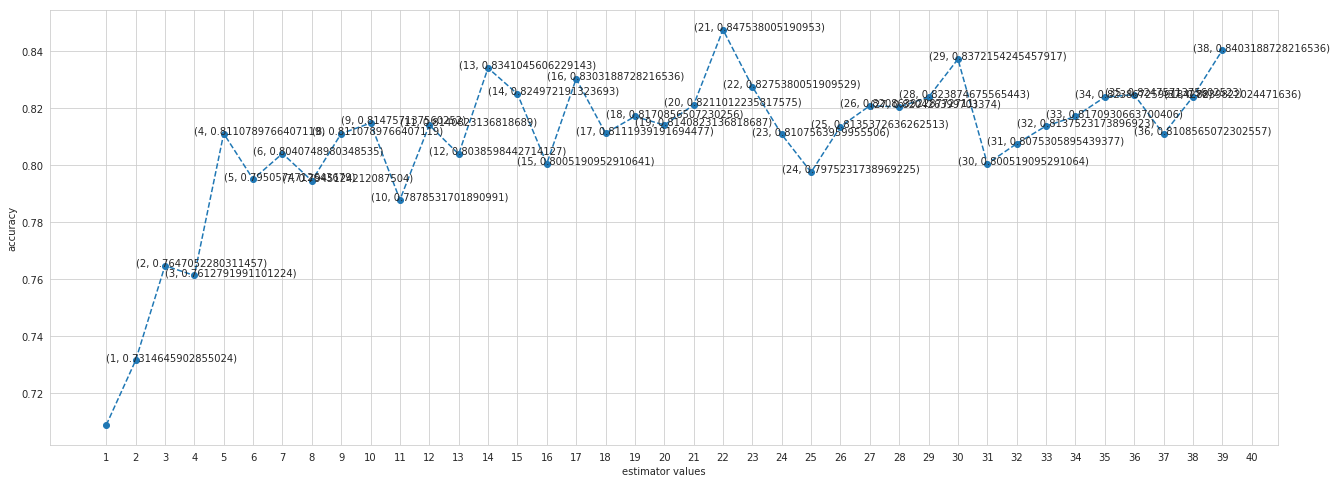

In [170]:
plt.figure(figsize=(22, 8))
plt.plot(error_rate.keys(), error_rate.values(), marker = 'o', linestyle = 'dashed')
for i in range(1, 39):
  plt.text(i , error[i], (i, error[i]))
plt.xticks([i for i in range (1, 41)])
plt.xlabel('estimator values')
plt.ylabel('accuracy')